In [16]:
import xml.etree.ElementTree as ET
import pandas as pd

def get_items(response):
    # 응답 데이터를 텍스트로 변환
    xml_string = response.text  # 또는 response.content.decode('utf-8')
    
    root = ET.fromstring(xml_string)
    item_list = []
    
    # 모든 row 엘리먼트 찾기
    rows = root.findall('row')
    
    # 각 row 엘리먼트에서 데이터 추출
    for row in rows:
        elements = row.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip() if element.text else None
            data[tag] = text
        item_list.append(data)
    
    return item_list

# items_list = get_items(res)
# items = pd.DataFrame(items_list)
# items.head()

In [17]:
import requests
import datetime
import certifi
import ssl

def get_data(statbl_id, datacycle_cd, cls_id):
    url = "https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?"
    service_key = "37f7a534514349d48f2cf77dc2691da3"
    

    call_code = "Key=" + service_key + "&" +\
        "pIndex=1&pSize=1000&" +\
        "STATBL_ID=" + statbl_id + "&" +\
        "DTACYCLE_CD=" + datacycle_cd +\
        "&START_WRTTIME=2022&END_WRTTIME=2025" +"&" +\
        "CLS_ID=" + cls_id
    
    print(url+call_code)
    res = requests.get(url + call_code, verify=certifi.where())
    return res

In [18]:
STATBL_ID = "A_2024_00050"
cls_id_list = ["530085", "530086", "530087"]
#cls_id_list = ["500009"]
tx_list = []
for cls_id in cls_id_list:
    res = get_data(STATBL_ID, "MM", cls_id)
    tx_list += get_items(res)
    
len(tx_list)
apt_tx = pd.DataFrame(tx_list)
apt_tx

https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00050&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530085
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00050&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530086
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00050&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530087


,STATBL_ID,DTACYCLE_CD,WRTTIME_IDTFR_ID,GRP_ID,GRP_NM,CLS_ID,CLS_NM,ITM_ID,ITM_NM,DTA_VAL,UI_NM,GRP_FULLNM,CLS_FULLNM,ITM_FULLNM
0,A_2024_00050,MM,202201,None,None,530085,덕양구,100001,지수,107.018153833629,지수,None,경기>경의권>고양시>덕양구,지수
1,A_2024_00050,MM,202202,None,None,530085,덕양구,100001,지수,106.838417314,지수,None,경기>경의권>고양시>덕양구,지수
2,A_2024_00050,MM,202203,None,None,530085,덕양구,100001,지수,106.604454133617,지수,None,경기>경의권>고양시>덕양구,지수
3,A_2024_00050,MM,202204,None,None,530085,덕양구,100001,지수,106.52245648358,지수,None,경기>경의권>고양시>덕양구,지수
4,A_2024_00050,MM,202205,None,None,530085,덕양구,100001,지수,106.57282582408,지수,None,경기>경의권>고양시>덕양구,지수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,A_2024_00050,MM,202403,None,None,530087,일산서구,100001,지수,81.6579624175292,지수,None,경기>경의권>고양시>일산서구,지수
89,A_2024_00050,MM,202404,None,None,530087,일산서구,100001,지수,81.9308927694047,지수,None,경기>경의권>고양시>일산서구,지수
90,A_2024_00050,MM,202405,None,None,530087,일산서구,100001,지수,82.3960569101572,지수,None,경기>경의권>고양시>일산서구,지수
91,A_2024_00050,MM,202406,None,None,530087,일산서구,100001,지수,82.6795266361179,지수,None,경기>경의권>고양시>일산서구,지수


In [19]:
goyang_apt_tx = apt_tx.drop(['DTACYCLE_CD', 'STATBL_ID','GRP_ID','GRP_NM','CLS_ID','ITM_ID','UI_NM','GRP_FULLNM', 'CLS_FULLNM','ITM_FULLNM'], axis=1)
goyang_apt_tx.isnull().sum()

WRTTIME_IDTFR_ID    0
CLS_NM              0
ITM_NM              0
DTA_VAL             0
dtype: int64

In [20]:
# 수치형식 변환
goyang_apt_tx['WRTTIME_IDTFR_ID'] = goyang_apt_tx['WRTTIME_IDTFR_ID'].astype(int)
goyang_apt_tx['DTA_VAL'] = goyang_apt_tx['DTA_VAL'].astype(float)

In [21]:
goyang_apt_tx

,WRTTIME_IDTFR_ID,CLS_NM,ITM_NM,DTA_VAL
0,202201,덕양구,지수,107.018154
1,202202,덕양구,지수,106.838417
2,202203,덕양구,지수,106.604454
3,202204,덕양구,지수,106.522456
4,202205,덕양구,지수,106.572826
...,...,...,...,...
88,202403,일산서구,지수,81.657962
89,202404,일산서구,지수,81.930893
90,202405,일산서구,지수,82.396057
91,202406,일산서구,지수,82.679527


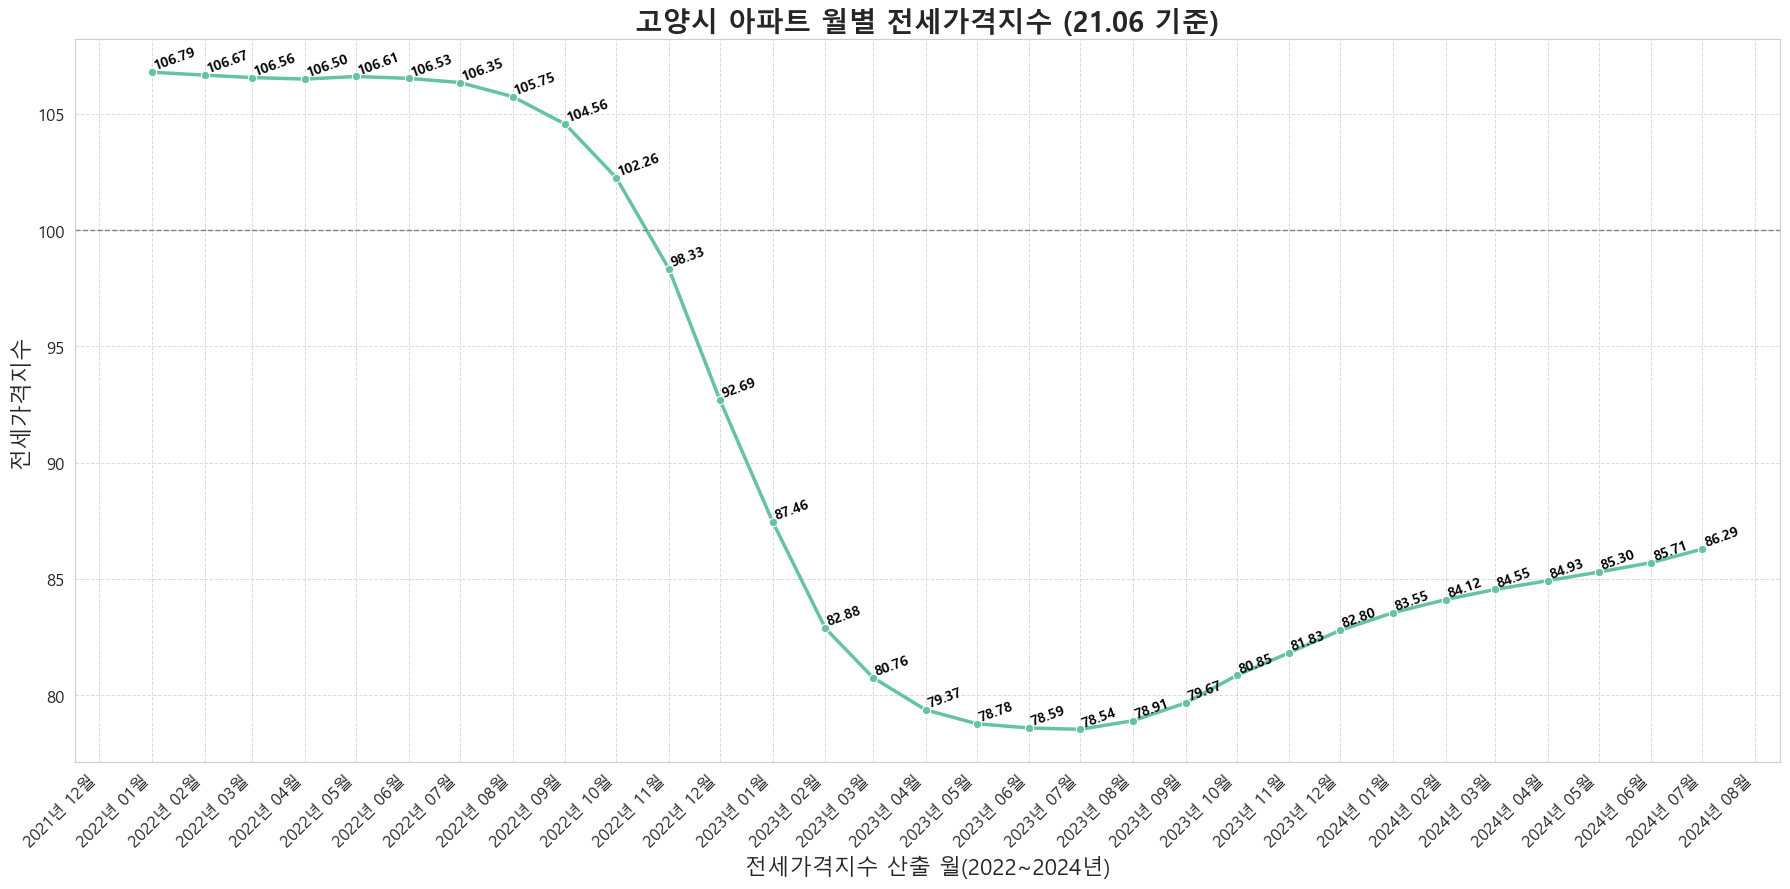

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi = goyang_apt_tx.copy()
goyang_monthly_indi['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi = goyang_monthly_indi.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi, x='WRTTIME_IDTFR_ID', y='DTA_VAL', marker='o', linewidth=2.5)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 전세가격지수 (21.06 기준)', fontsize=20, weight='bold')
plt.xlabel('전세가격지수 산출 월(2022~2024년)', fontsize=16)
plt.ylabel('전세가격지수', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

# 레이아웃 조정
plt.tight_layout()

# 각 데이터 포인트 위에 평균 거래금액 표시
for i in range(len(monthly_avg_indi)):
    plt.text(monthly_avg_indi['WRTTIME_IDTFR_ID'].iloc[i], 
             monthly_avg_indi['DTA_VAL'].iloc[i], 
             f'{monthly_avg_indi["DTA_VAL"].iloc[i]:,.2f}', 
             ha='left', va='bottom', fontsize=10, color='black', fontweight='bold', rotation=20)

# 그래프 표시
plt.show()

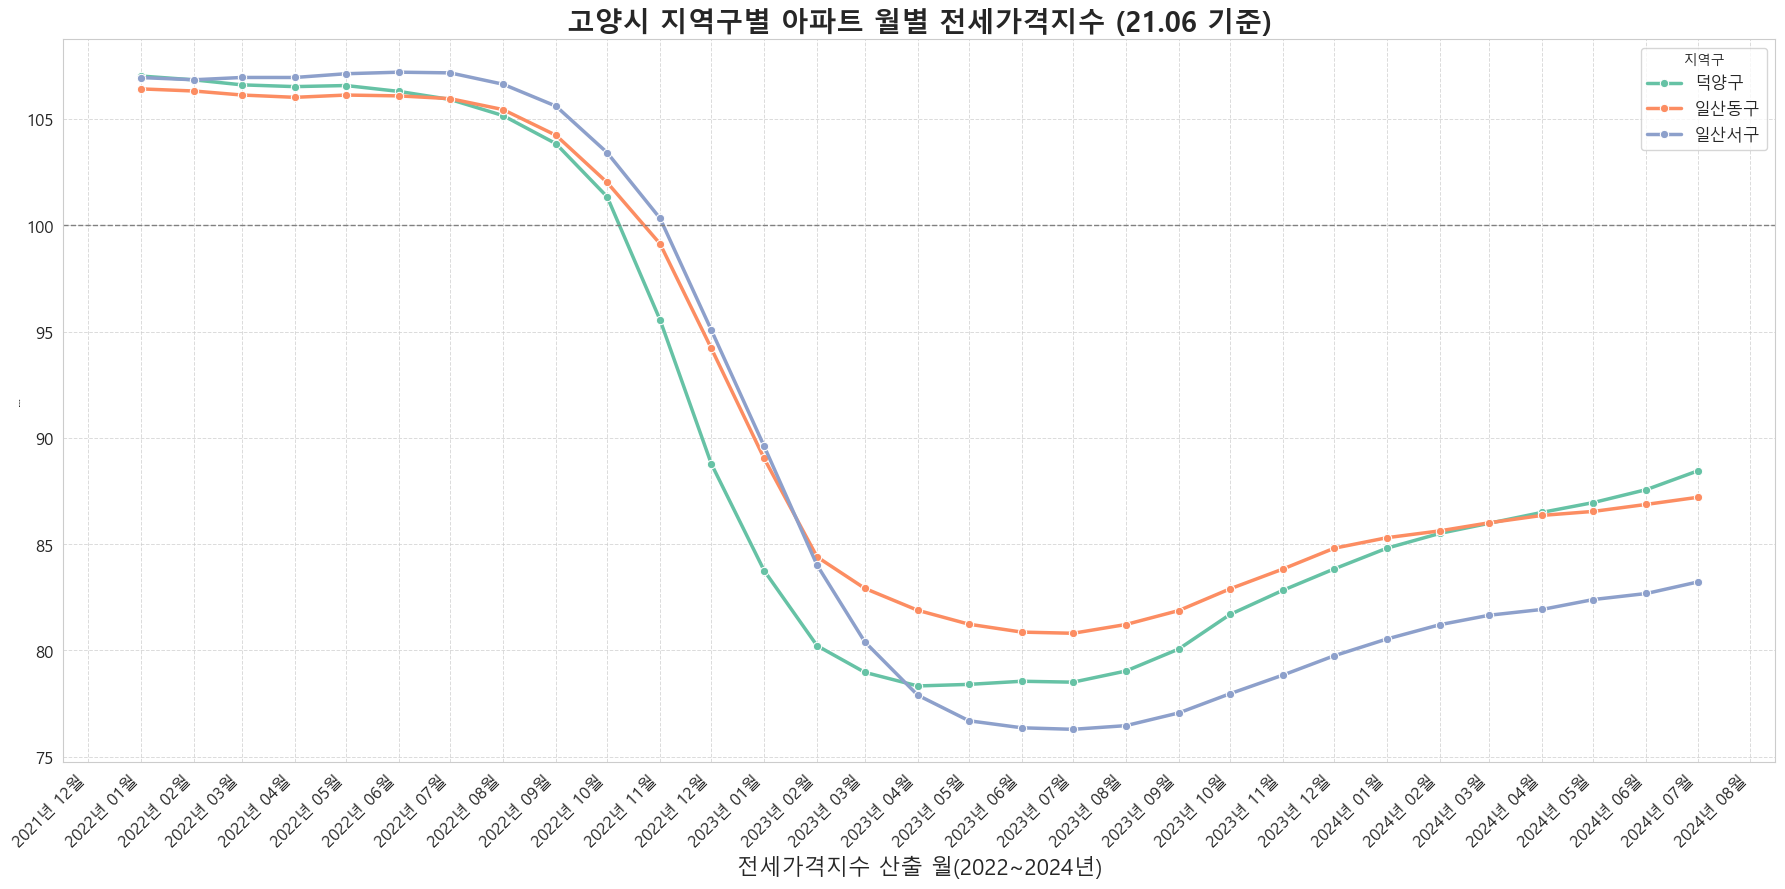

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
items_monthly_indi_gu = goyang_apt_tx.copy()
items_monthly_indi_gu['WRTTIME_IDTFR_ID'] = pd.to_datetime(items_monthly_indi_gu['WRTTIME_IDTFR_ID'], format='%Y%m')

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=items_monthly_indi_gu, x='WRTTIME_IDTFR_ID', y='DTA_VAL', hue='CLS_NM', marker='o', linewidth=2.5, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 지역구별 아파트 월별 전세가격지수 (21.06 기준)', fontsize=20, weight='bold')
plt.xlabel('전세가격지수 산출 월(2022~2024년)', fontsize=16)
plt.ylabel('전세가격지수', fontsize=1)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

plt.legend(title='지역구', fontsize=12)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


posx and posy should be finite values
posx and posy should be finite values


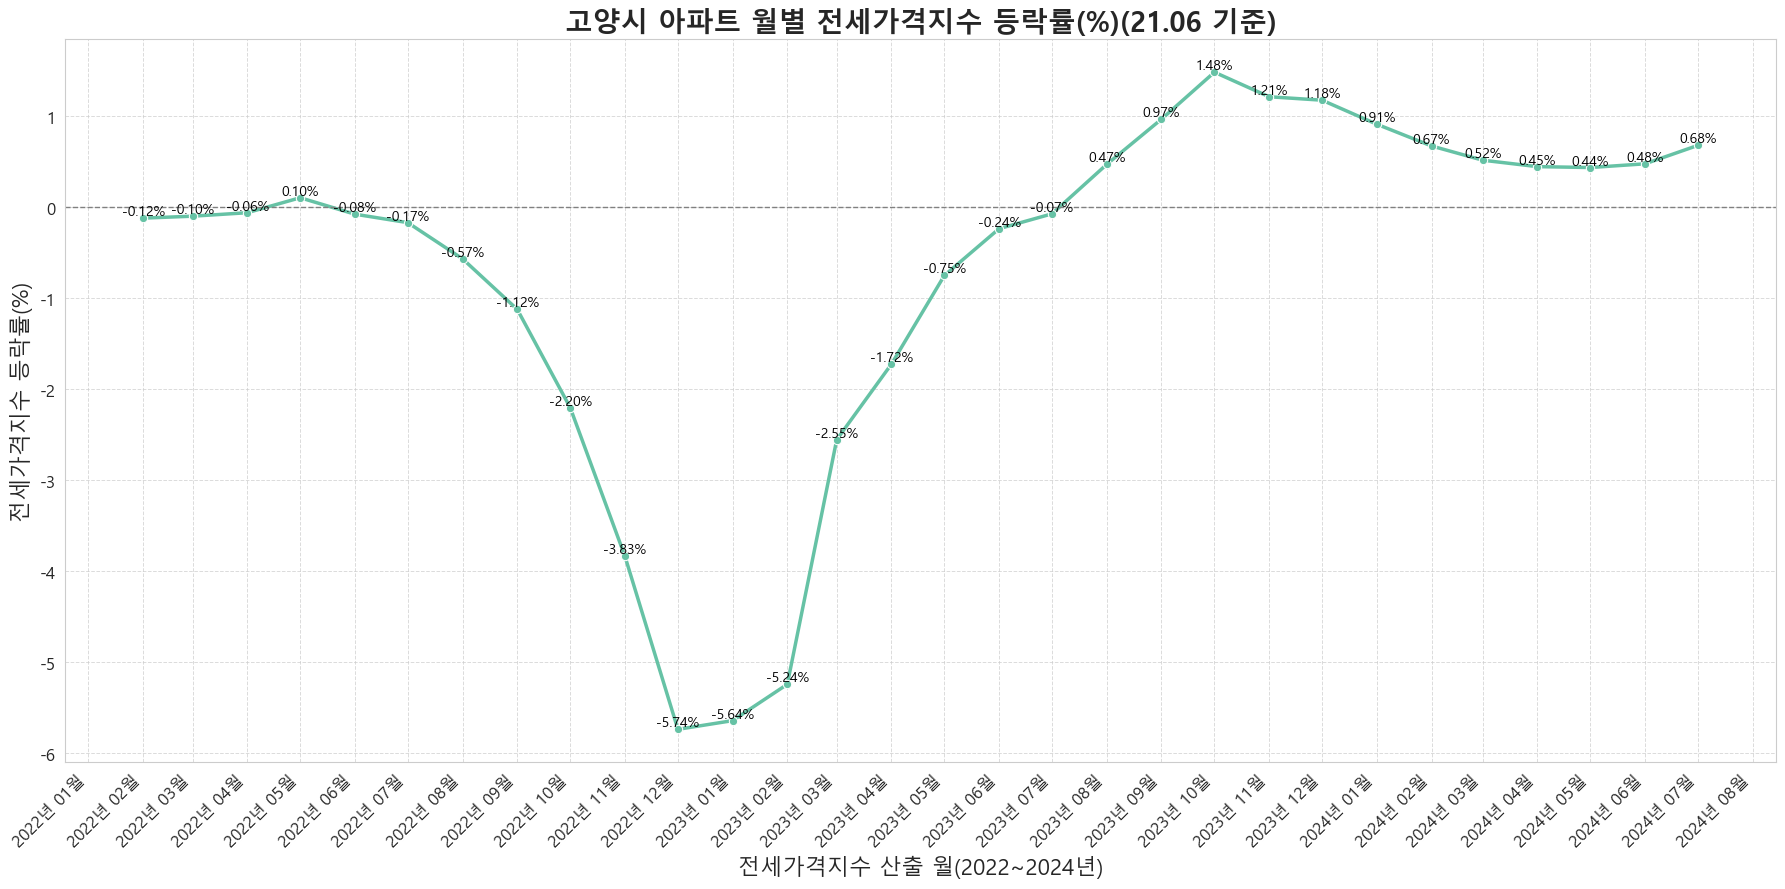

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi_change = goyang_apt_tx.copy()
goyang_monthly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi_change = goyang_monthly_indi_change.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_indi_change = monthly_avg_indi_change.sort_values('WRTTIME_IDTFR_ID')
monthly_avg_indi_change['prev_valAmount'] = monthly_avg_indi_change['DTA_VAL'].shift(1)
monthly_avg_indi_change['change_rate'] = (monthly_avg_indi_change['DTA_VAL'] - monthly_avg_indi_change['prev_valAmount']) / monthly_avg_indi_change['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_change, x='WRTTIME_IDTFR_ID', y='change_rate', marker='o', linewidth=2.5)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 전세가격지수 등락률(%)(21.06 기준)', fontsize=20, weight='bold')
plt.xlabel('전세가격지수 산출 월(2022~2024년)', fontsize=16)
plt.ylabel('전세가격지수 등락률(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# 그래프 위에 등락률 수치 추가
for i in range(len(monthly_avg_indi_change)):
    plt.text(monthly_avg_indi_change['WRTTIME_IDTFR_ID'].iloc[i], monthly_avg_indi_change['change_rate'].iloc[i], 
             f'{monthly_avg_indi_change["change_rate"].iloc[i]:.2f}%', 
             ha='center', va='bottom', fontsize=10, color='black')


# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

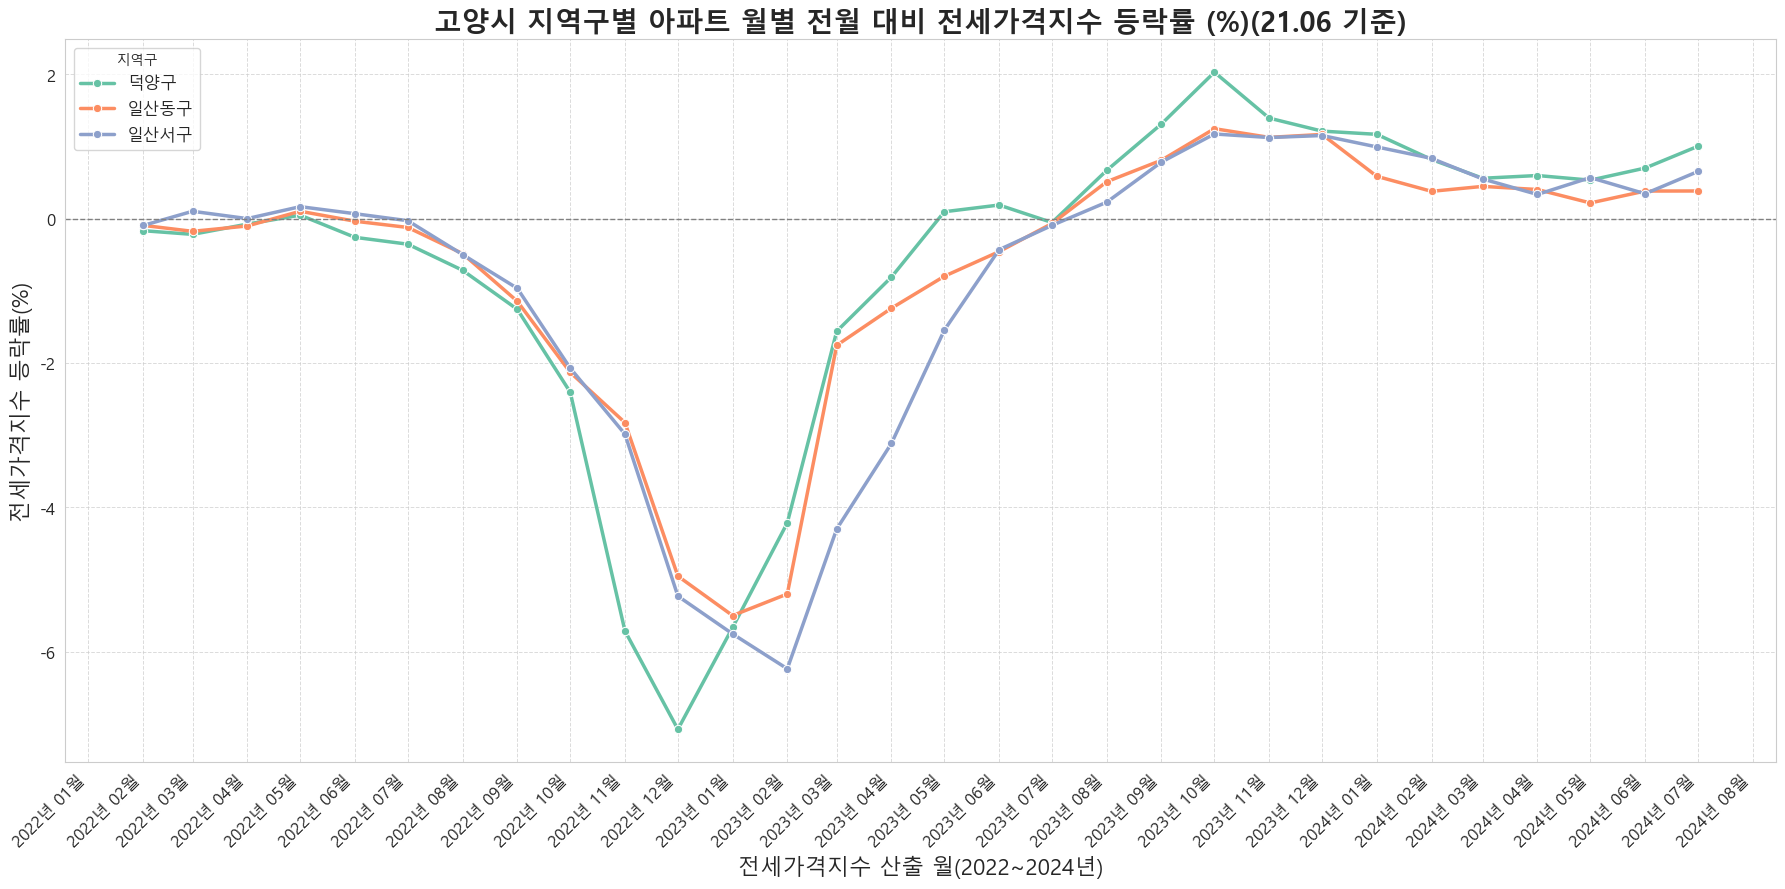

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
goyang_monthly_indi_change = goyang_apt_tx.copy()
goyang_monthly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi_change_gu = goyang_monthly_indi_change.groupby(['WRTTIME_IDTFR_ID', 'CLS_NM'])['DTA_VAL'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_indi_change_gu = monthly_avg_indi_change_gu.sort_values(['CLS_NM', 'WRTTIME_IDTFR_ID'])
monthly_avg_indi_change_gu['prev_valAmount'] = monthly_avg_indi_change_gu.groupby('CLS_NM')['DTA_VAL'].shift(1)
monthly_avg_indi_change_gu['change_rate'] = (monthly_avg_indi_change_gu['DTA_VAL'] - monthly_avg_indi_change_gu['prev_valAmount']) / monthly_avg_indi_change_gu['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_change_gu, x='WRTTIME_IDTFR_ID', y='change_rate', hue='CLS_NM', marker='o', linewidth=2.5, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 지역구별 아파트 월별 전월 대비 전세가격지수 등락률 (%)(21.06 기준)', fontsize=20, weight='bold')
plt.xlabel('전세가격지수 산출 월(2022~2024년)', fontsize=16)
plt.ylabel('전세가격지수 등락률(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.legend(title='지역구', fontsize=12)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()
